In [111]:
import numpy as np
from lattice_class import *
import scipy.linalg
import matplotlib.pyplot as plt

# 1. Create Lattice

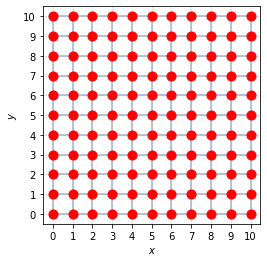

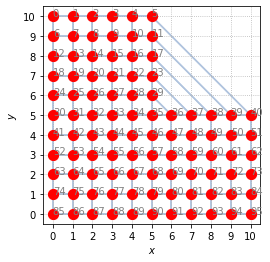

In [112]:
N = 11
lattice = SquareLattice(N, "open")
lattice.plot()
reciprocal_lattice_sites = lattice.get_reciprocal_sites()

ctr = 0
for i in range(N // 2):
    for j in range(N // 2 + 1, N):
        lattice.remove_site(i * N + j - ctr)
        ctr += 1

for i in range(N // 2):
    lattice.add_edge(
        (i * (N // 2 + 1) + N // 2, (N // 2 + 1) * (N // 2) + N - (i + 1)), (1, 0)
    )
    # lattice.change_local_edge_index((i * (N // 2 + 1) + N // 2, (N // 2 + 1) * (N // 2) + N - (i + 1)), 2)
    # lattice.change_local_edge_index(((N // 2 + 1) * (N // 2) + N - (i + 1), i * (N // 2 + 1) + N // 2), 0)

# lattice.remove_site((N//2)*N + N//2 - 1)
# lattice.remove_site((N//2)*N + N//2 - 1)
# lattice.remove_site((N//2)*N + N//2 - 1)

# for i in range(N):
#     lattice.remove_site(lattice.get_num_sites()-1)

# for i in range(N-1):
#     lattice.add_site((i * (N-1)/(N-2), 0.0))

# for i in range(N-2):
#     lattice.add_edge(((N-1)*N+i, (N-1)*N+1+i))

# lattice.add_edge(((N-1)*N+(N-1)//2, (N-2)*N+N//2))
# lattice.add_edge(((N-1)*N+(N-1)//2, (N-2)*N+N//2-1))
# lattice.add_edge((8, 12))
# lattice.add_edge((11, 14))

# lattice.remove_edge((1, 2))
# # lattice.add_site((1.5, 3.5))

# centre = (1.5, 2.5)
# coords = []
# num_corners = 5
# for i in range(num_corners):
#     coords.append((np.cos(2.0 * np.pi * i/ num_corners) + centre[0], np.sin(2.0 * np.pi * i/  num_corners) + centre[1]))

# print(coords)

# lattice.move_site(1, (0.8, 2.8))
# lattice.move_site(2, (2.2, 2.8))
# lattice.add_edge((1, 15))
# lattice.add_edge((2, 15))

# for coord in coords:
#     lattice.add_site(coord)

lattice_sites = lattice.get_sites()
lattice_edges = lattice.get_edges()
num_sites = lattice.get_num_sites()
lattice.plot(True)

[[ 6.30208333e-01+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  8.67361738e-19+2.42861287e-17j]
 [ 0.00000000e+00+0.00000000e+00j  6.30208333e-01+0.00000000e+00j
   8.67361738e-19+2.42861287e-17j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  8.67361738e-19-2.42861287e-17j
  -6.30208333e-01+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 8.67361738e-19-2.42861287e-17j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j -6.30208333e-01+0.00000000e+00j]]
[array([[-0.63020833+2.86229374e-17j,  0.        +0.00000000e+00j,
         0.        +0.00000000e+00j,  0.31510417+2.60208521e-17j],
       [ 0.        +0.00000000e+00j, -0.63020833+2.86229374e-17j,
         0.31510417+2.60208521e-17j,  0.        +0.00000000e+00j],
       [ 0.        +0.00000000e+00j, -0.31510417-2.45029691e-17j,
         0.63020833-2.86229374e-17j,  0.        +0.00000000e+00j],
       [-0.31510417-2.45029691e-17j,  0.        +0.00000000e+00j,
 

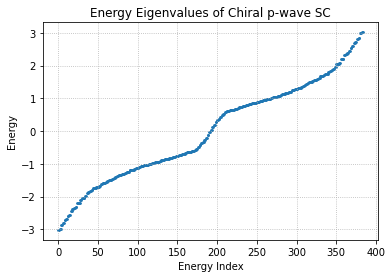

In [113]:
mu = -0.5
delta = complex(0.5, 0.0)

H_k = lambda k: np.array(
    [
        [-(np.cos(k[0]) + np.cos(k[1])) - mu, 0.0],
        [0.0, -(np.cos(k[0]) + np.cos(k[1])) - mu],
    ],
    dtype=complex,
)
gap_fct = lambda k: np.array(
    [
        [0.0, delta * complex(np.sin(k[0]), np.sin(k[1]))],
        [delta * complex(np.sin(k[0]), np.sin(k[1])), 0.0],
    ],
    dtype=complex,
)
H_BdG = lambda k: np.block(
    [[H_k(k), gap_fct(k)], [gap_fct(k).conj().T, -H_k(-k).conj()]]
)
dim_H_BdG = 4

hop_phase = complex(1.0, 0.0)
H_k_hop = lambda k: np.array(
    [
        [-(hop_phase * np.cos(k[0]) + np.cos(k[1])) - mu, 0.0],
        [0.0, -(hop_phase * np.cos(k[0]) + np.cos(k[1])) - mu],
    ],
    dtype=complex,
)

H_BdG_hop = lambda k: np.block(
    [[H_k_hop(k), gap_fct(k)], [gap_fct(k).conj().T, -H_k_hop(-k).conj()]]
)

def get_H_tilde(direction, axis=0):
    H_tilde = np.zeros(shape=(dim_H_BdG, dim_H_BdG), dtype=complex)
    for k in reciprocal_lattice_sites:
        H_tilde += (
            1.0
            / num_sites
            * H_BdG(np.array(k) / N)
            * np.exp(direction * complex(0.0, 1.0) * k[axis] / N)
        )
    return H_tilde

def get_H_tilde_hop(direction, axis=0):
    H_tilde = np.zeros(shape=(dim_H_BdG, dim_H_BdG), dtype=complex)
    for k in reciprocal_lattice_sites:
        H_tilde += (
            1.0
            / num_sites
            * H_BdG_hop(np.array(k) / N)
            * np.exp(direction * complex(0.0, 1.0) * k[axis] / N)
        )
    return H_tilde

H_direct_lattice = np.zeros(
    shape=(num_sites * dim_H_BdG, num_sites * dim_H_BdG), dtype=complex
)
block_indices = [
    slice(block_idx * dim_H_BdG, (block_idx + 1) * dim_H_BdG)
    for block_idx in range(lattice.get_num_sites())
]

H_Ce_tilde = get_H_tilde(0)
H_Le_tilde = get_H_tilde(-1, 0)
H_Ri_tilde = get_H_tilde(+1, 0)
H_To_tilde = get_H_tilde(-1, 1)
H_Lo_tilde = get_H_tilde(+1, 1)
H_tilde = [H_To_tilde, H_Ri_tilde, H_Lo_tilde, H_Le_tilde]

H_Ce_tilde_hop = get_H_tilde_hop(0)
H_Le_tilde_hop = get_H_tilde_hop(-1, 0)
H_Ri_tilde_hop = get_H_tilde_hop(+1, 0)
H_To_tilde_hop = get_H_tilde_hop(-1, 1)
H_Lo_tilde_hop = get_H_tilde_hop(+1, 1)
H_tilde_hop = [H_To_tilde_hop, H_Ri_tilde_hop, H_Lo_tilde_hop, H_Le_tilde_hop]

print(H_Ce_tilde)
print(H_tilde)

local_edge_indices = lattice.get_local_edge_indices()

phase_list = [36, 37, 38, 39, 40]

for (site_idx, site) in enumerate(lattice.get_sites()):
    H_direct_lattice[block_indices[site_idx], block_indices[site_idx]] = H_Ce_tilde


    for neighbour_idx in lattice_edges[site_idx]:
        if not (neighbour_idx in phase_list and site_idx in phase_list):
            H_direct_lattice[
                block_indices[site_idx], block_indices[neighbour_idx]
            ] = H_tilde[lattice.get_local_edge_index(site_idx, neighbour_idx)]
        else: 
            H_direct_lattice[
                block_indices[site_idx], block_indices[neighbour_idx]
            ] = H_tilde_hop[lattice.get_local_edge_index(site_idx, neighbour_idx)]

energies, states = scipy.linalg.eigh(H_direct_lattice)
print("Lowest found energy: ", np.min(np.abs(energies)))
gs_idx = np.argmin(np.abs(energies))
print("Index of lowest absolute energy: ", gs_idx)

plt.xlabel("Energy Index")
plt.ylabel("Energy")
plt.grid(linestyle=":")
plt.title("Energy Eigenvalues of Chiral p-wave SC")
plt.scatter(range(len(energies)), energies, s=3)

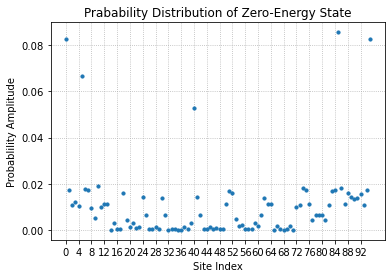

In [114]:
gs_wave_function = states[:, gs_idx]
gs_probabilities_nambu = np.square(np.abs(gs_wave_function))
gs_probabilities = np.zeros(shape=(num_sites, 1))

for site_idx in range(num_sites):
    gs_probabilities[site_idx] = np.sum(gs_probabilities_nambu[block_indices[site_idx]])

plt.xlabel("Site Index")
plt.xticks(range(0, num_sites, num_sites // min(num_sites, 20)))
plt.ylabel("Probablility Amplitude")
plt.title("Prabability Distribution of Zero-Energy State")
plt.grid(linestyle=":", zorder=-10)
plt.scatter(range(num_sites), gs_probabilities, s=10, zorder=10)

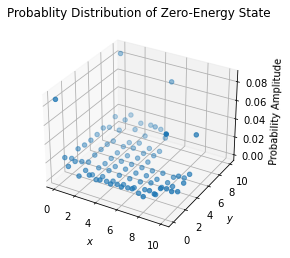

In [115]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
x_values = [k[0] for k in lattice_sites]
y_values = [k[1] for k in lattice_sites]

plt.grid(linestyle=":")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
ax.set_zlabel("Probability Amplitude")
ax.set_title("Probablity Distribution of Zero-Energy State")
ax.scatter(x_values, y_values, gs_probabilities)

## Hop phase results

### Including site nearest to disclination
n = 0: hop_phase  = $e^{\frac{n\pi}{2}} = 1.0$ hase Lowest found energy:  0.04097816009540169

n = 1: hop_phase = $e^{\frac{n\pi}{2}} = 1.0i$ has Lowest found energy:  0.021916341743397627

n = -1: hop_phase = $e^{\frac{n\pi}{2}}= -1.0i$ has Lowest found energy:  0.021916341743398515

### Excluding site nearest to disclination
n = 0: hop_phase  = $e^{\frac{n\pi}{2}} = 1.0$ hase Lowest found energy:  0.04097816009540169

n = 1: hop_phase = $e^{\frac{n\pi}{2}} = 1.0i$ has Lowest found energy:  0.019389934552859867

n = -1: hop_phase = $e^{\frac{n\pi}{2}}= -1.0i$ has Lowest found energy:  0.019389934552861643